# Example usage of `postmerger.spherical_spheroidal_mixing`

Spherical spheroidal mixing coefficients $\mu_{ml'ln}$ are defined by
$$
h_{lmn}=\sum_{l'}\mu_{mll'n}^*~^{^S}h_{l'mn}~_{-2}{Y}{_{lm}}
$$
where $^{S}h_{l'mn}$ are the strain components defined in the _spheroidal-harmonics_ basis, while $h_{lmn}$ are the strain components defined in the _spherical-harmonics_ basis. The symbol $^*$ denotes complex conjugation.

The above definition follows from Eq. (5) of https://arxiv.org/abs/1408.1860 . However, we apply a correction factor $(-1)^{l+l'}$ to compensate for a different definition of spin-weighted spherical harmonics in the SXS catalog: this is obtained by setting `enforce_sxs_convention=True` (default).

In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import postmerger as pm

## Read documentation

In [4]:
help(pm.spherical_spheroidal_mixing)

Help on function spherical_spheroidal_mixing in module postmerger._utils:

spherical_spheroidal_mixing(lm, mode, spin, method='BK14', prograde=1, qnm_method='interp', enforce_sxs_convention=True, s=-2, _fitting_coeffs={})
    Returns spherical-spheroidal mixing coefficients mu_{m,l,lt,n} as defined by Eq. (5) in https://arxiv.org/abs/1408.1860 .
    Note that they are the complex conjugates of the mixing coefficients C_{lt,l,m,n} defined in https://arxiv.org/abs/1908.10377 .

    Parameters
    ----------
    lm : tuple
        Indices (lt,m) of the spherical harmonic.

    mode : tuple
        Indices (l,m,n) of the spheroidal harmonic.

    spin : float or array_like
        Dimensionless spin of the Kerr black hole.

    method : str. Default='BK14'.
        The method used to compute mixing coefficients. Allowed options: ['BK14','PT73'].

        If 'BK14', it uses the fitting coefficients presented in https://arxiv.org/abs/1408.1860 and provided at https://pages.jh.edu/eberti2/rin

## Evaluate mixing coefficients

In [5]:
## evaluate mu_{2320}

## spherical-harmonic indices
lm = (3,2)

## spheroidal-harmonic indices
mode = (2,2,0)

## final spin
spin = 0.68

mu_re, mu_im = pm.spherical_spheroidal_mixing(lm,mode,spin)

## results
print('mu_{2320} =',mu_re+1j*mu_im)

mu_{2320} = (0.0665939069543019+0.011046238081249502j)


Note that spherical-spheroidal mixing with $l=l'$ is not null:

In [6]:
## evaluate mu_{2330}

## spherical-harmonic indices
lm = (3,2)

## spheroidal-harmonic indices
mode = (3,2,0)

## final spin
spin = 0.68

mu_re, mu_im = pm.spherical_spheroidal_mixing(lm,mode,spin)

## results
print('mu_{2330} =',mu_re+1j*mu_im)

mu_{2330} = (0.9899656358674489-0.022394437936684233j)


Nonetheless, the amount of mixing is small, i.e., the real part is close to 1. 

The default `method` to compute mixing coefficients is `'BK14'`, which provdes fitting coefficients to numerical tables. Instead, `method='PT73'` resorts to a perturbation theory expansions and can be written in closed form. In this limit, the mixing for $l=l'$ is exactly null:

In [7]:
## evaluate mu_{2330} with method='PT73'

## spherical-harmonic indices
lm = (3,2)

## spheroidal-harmonic indices
mode = (3,2,0)

## final spin
spin = 0.68

mu_re, mu_im = pm.spherical_spheroidal_mixing(lm,mode,spin,method='PT73')

## results
print('mu_{2330} =',mu_re+1j*mu_im)

mu_{2330} = (1+0j)


while for $l\neq l'$ it gives results similar to `'BK14'`:

In [8]:
## evaluate mu_{2320} with method='PT73'

## spherical-harmonic indices
lm = (3,2)

## spheroidal-harmonic indices
mode = (2,2,0)

## final spin
spin = 0.68

mu_re, mu_im = pm.spherical_spheroidal_mixing(lm,mode,spin,method='PT73')

## results
print('mu_{2320} =',mu_re+1j*mu_im)

mu_{2320} = (0.06691801252539002+0.010410156367386333j)


## Batch evaluation

In [9]:
## evaluate mu_{2320}

## spherical-harmonic indices
lm = (3,2)

## spheroidal-harmonic indices
mode = (2,2,0)

## final spin
spin = np.linspace(-1,1,100)

mu_re, mu_im = pm.spherical_spheroidal_mixing(lm,mode,spin)

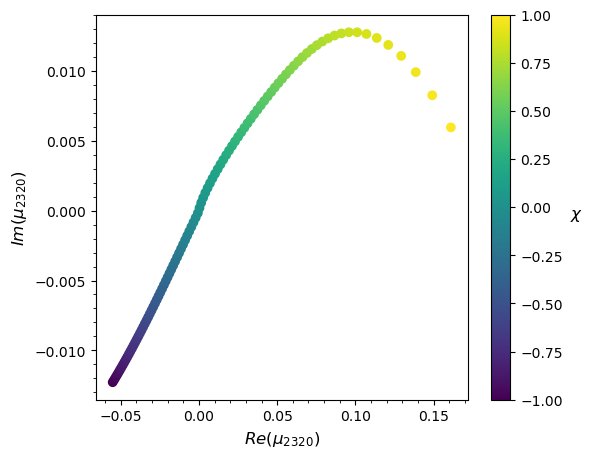

In [10]:
fig, axs = plt.subplots(1,1,figsize=(6,5))
t = axs.scatter(mu_re,mu_im,c=spin)
cbar = plt.colorbar(mappable=t,ax=axs)
cbar.set_label(r'$\chi$',rotation=0,fontsize=12,labelpad=10)
axs.set_xlabel(r'$Re(\mu_{2320})$',fontsize=12)
axs.set_ylabel(r'$Im(\mu_{2320})$',fontsize=12)
axs.minorticks_on()
plt.show()